In [ ]:
# Forest Cover Type Classification

In [1]:
import pandas as pd

df = pd.read_csv('forest_dataset.csv')
display(df.head())
display(df.info())
display(df.shape)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
 1   1       10000 non-null  int64
 2   2       10000 non-null  int64
 3   3       10000 non-null  int64
 4   4       10000 non-null  int64
 5   5       10000 non-null  int64
 6   6       10000 non-null  int64
 7   7       10000 non-null  int64
 8   8       10000 non-null  int64
 9   9       10000 non-null  int64
 10  10      10000 non-null  int64
 11  11      10000 non-null  int64
 12  12      10000 non-null  int64
 13  13      10000 non-null  int64
 14  14      10000 non-null  int64
 15  15      10000 non-null  int64
 16  16      10000 non-null  int64
 17  17      10000 non-null  int64
 18  18      10000 non-null  int64
 19  19      10000 non-null  int64
 20  20      10000 non-null  int64
 21  21      10000 non-null  int64
 22  22      10000 non-null  int64
 23  23      1000

None

(10000, 55)

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Separate features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Missing values per column:
Series([], dtype: int64)

Data split into training and testing sets:
X_train shape: (8000, 54)
X_test shape: (2000, 54)
y_train shape: (8000,)
y_test shape: (2000,)


In [4]:
# Adjust the target variable for XGBoost to be zero-based
y_train_zero_based = y_train - 1

# Train the XGBoost model with the adjusted target variable
print("Training XGBoost model...")
xgb_model.fit(X_train, y_train_zero_based)
print("XGBoost model training complete.")

Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:15:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model training complete.


Random Forest Metrics:
Accuracy: 0.7970
Precision: 0.7950
Recall: 0.7970
F1-score: 0.7906

XGBoost Metrics:
Accuracy: 0.7970
Precision: 0.7954
Recall: 0.7970
F1-score: 0.7933

Best performing model: Random Forest


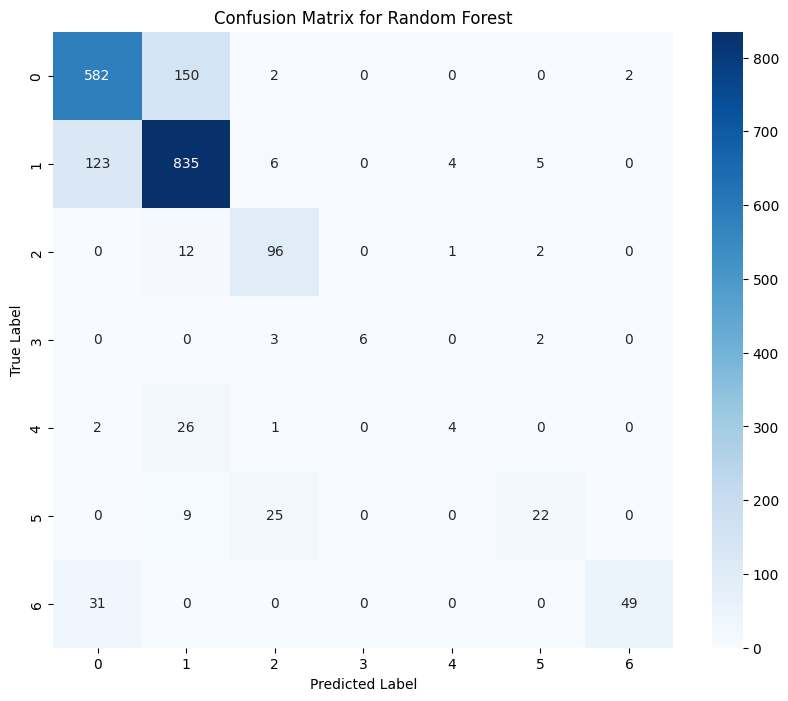

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Adjust XGBoost predictions back to original label range
y_pred_xgb_original = y_pred_xgb + 1

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_original)
precision_xgb = precision_score(y_test, y_pred_xgb_original, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb_original, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb_original, average='weighted')

# Print metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

print("\nXGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

# Determine the best performing model based on accuracy
if accuracy_rf >= accuracy_xgb:
    best_model_name = "Random Forest"
    best_y_pred = y_pred_rf
else:
    best_model_name = "XGBoost"
    best_y_pred = y_pred_xgb_original

print(f"\nBest performing model: {best_model_name}")

# Generate and visualize confusion matrix for the best model
cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

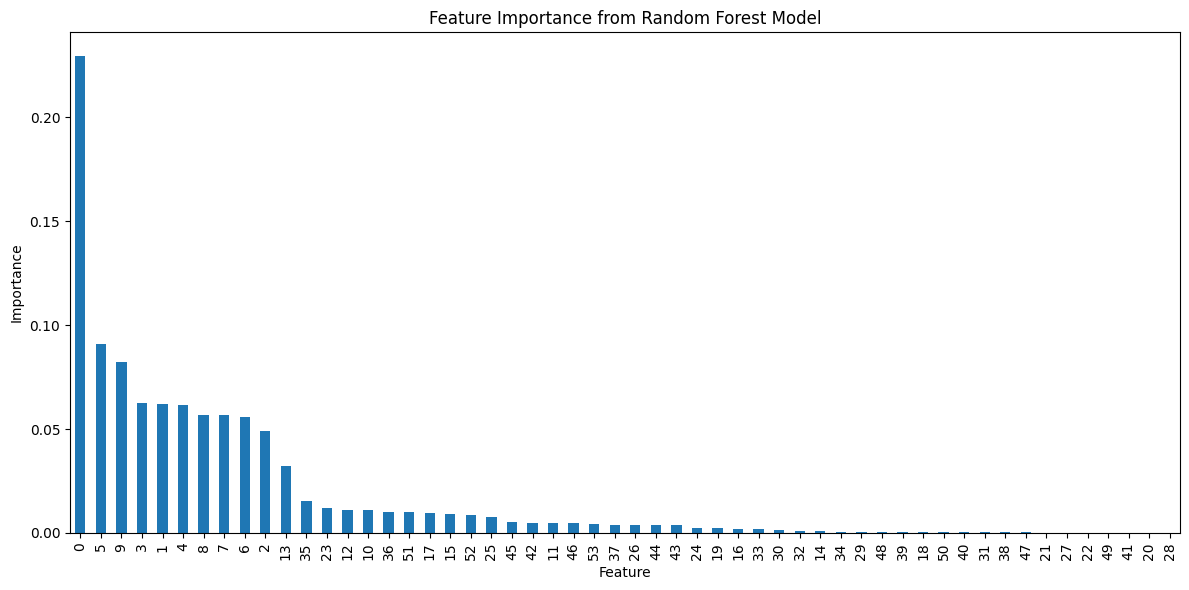

In [6]:
import matplotlib.pyplot as plt

# Access the feature_importances_ attribute
feature_importances = rf_model.feature_importances_

# Create a pandas Series with feature names as index
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the series in descending order
feature_importance_series_sorted = feature_importance_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
feature_importance_series_sorted.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3, # Use 3-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           verbose=2)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

# Print the best parameters found
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print the best score achieved
print("\nBest cross-validation accuracy:")
print(grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

Starting GridSearchCV...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
GridSearchCV complete.

Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation accuracy:
0.7907507904347666


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the best_rf_model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate metrics for best_rf_model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted')
recall_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted')
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

# Print the performance metrics for the best_rf_model
print("Best Random Forest Model Metrics (after tuning):")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-score: {f1_best_rf:.4f}")

# Print the performance metrics for the original models for comparison
print("\nOriginal Model Metrics (before tuning):")
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

print("\nXGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

Best Random Forest Model Metrics (after tuning):
Accuracy: 0.8080
Precision: 0.8091
Recall: 0.8080
F1-score: 0.8022

Original Model Metrics (before tuning):
Random Forest:
Accuracy: 0.7970
Precision: 0.7950
Recall: 0.7970
F1-score: 0.7906

XGBoost:
Accuracy: 0.7970
Precision: 0.7954
Recall: 0.7970
F1-score: 0.7933


## Summary:

*   The dataset contains 10,000 entries and 55 columns, all of which are integer types with no missing values.
*   The target variable for XGBoost required adjustment to be zero-based for successful training.
*   Before hyperparameter tuning, both the default Random Forest and XGBoost models achieved an accuracy of 0.7970 on the test set.
*   XGBoost showed slightly higher precision and F1-score than the default Random Forest.
*   Feature importance analysis on the Random Forest model revealed the relative influence of different features on the predictions.
*   Hyperparameter tuning on the Random Forest model using `GridSearchCV` improved the accuracy to 0.8080 on the test set.
*   The best hyperparameters for Random Forest were found to be `{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}`.
*   The tuned Random Forest model outperformed the original Random Forest and XGBoost models across all evaluated metrics (Accuracy, Precision, Recall, F1-score).

*   The improvement from hyperparameter tuning suggests that further optimization, potentially with a broader hyperparameter search space or more advanced tuning techniques (e.g., Randomized Search, Bayesian Optimization), could yield even better results.

